### Santander Customer Transaction Prediction
---
Can you identify who will make a transaction?

This is a case study, proposed by Banco Santander in a Kaggle competition, where we need to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

[Kaggle Dataset](https://www.kaggle.com/c/santander-customer-transaction-prediction/overview)

In [314]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt #plot our graphics and visualize our data
import seaborn as sns #plot beautiful graphics :)
import pandas_profiling as pp #pandas profiling analyse our entire dataset and facilate our work in a EDA
import warnings
warnings.filterwarnings('ignore')

In [315]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

### Procedures:
---
- Exploratory Data Analysis
- Feature Engineering
- Feature Selection
- Various Models
- Ensemble

In [316]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [317]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [318]:
print('Number of Training = {}'.format(train_data.shape[0]))
print('Number of Test = {}\n'.format(test_data.shape[0]))

#target columns
train_data.columns

Number of Training = 200000
Number of Test = 200000



Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

#### Checking for missing data
---

In [319]:
pd.isnull(train_data).sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [320]:
#Check for the missing values: 
pd.isnull(test_data).sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [321]:
train_data.describe(include="all")

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
unique,200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train_97994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,NaN,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,NaN,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,NaN,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,NaN,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,NaN,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800


In [322]:
test_data.describe(include="all")

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
unique,200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,test_191636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,NaN,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,NaN,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,NaN,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,NaN,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,NaN,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400


#### Data Visualization
---

From the previous analysis above and the description of the data, we can conclude that:
- All features have numerical values;
- We don't have missing values;
- Our prediction is a binary prediction;
- All values are unique;
- There are 10,049% target valute with __1__ (train data);

**To better understand the data, which is _anonymously_. I will continue with some visualizations of the data distributions, such as the average, the maximum and minimum in each set: training and testing. Basically, we want to know what this data looks like visually.**

In the following two plots, we'll see the first 12 features distributions. The first, we will see the probability density of each variable with target 0 and 1 in the training data. And the second, the density of the distribution between the training and test sets.

In [331]:
def plotting_feature_distribution(df1, df2, features):
    
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(24,14))

    count = 0
    for feature in features:
        count = count + 1
        
        plt.subplot(3,6,count)
        
        sns.kdeplot(data=df1[feature], bw=1 ,cut=3, palette="crest", label="Target 0")
        sns.kdeplot(data=df2[feature], bw=1, cut=3, palette="crest", label="Target 1")
        #bw_adjust=3, cut=3, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)
        locs, labels = plt.xticks()
        
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
        plt.legend()
    

<Figure size 432x288 with 0 Axes>

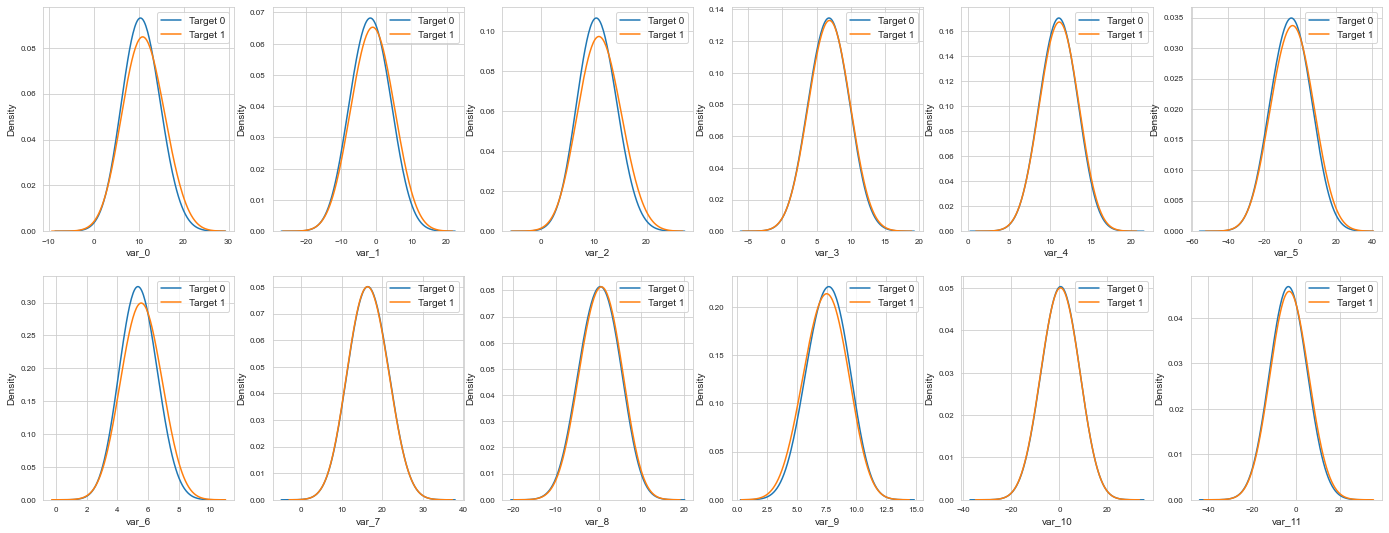

In [332]:
tgt0 = train_data.loc[train_data['target'] == 0]
tgt1 = train_data.loc[train_data['target'] == 1]

features = train_data.columns.values[2:14]
plotting_feature_distribution(tgt0, tgt1, features)

**For each feature, we can see a very short difference between the density of the features when the target is 0 or 1. Looking at the training and test data, they have a very close density. As the data is anonymous and we don't know much about each feature, we can conclude that this dataset had a good pre-processing of the data, but not necessarily that they have been normalized.**

<Figure size 432x288 with 0 Axes>

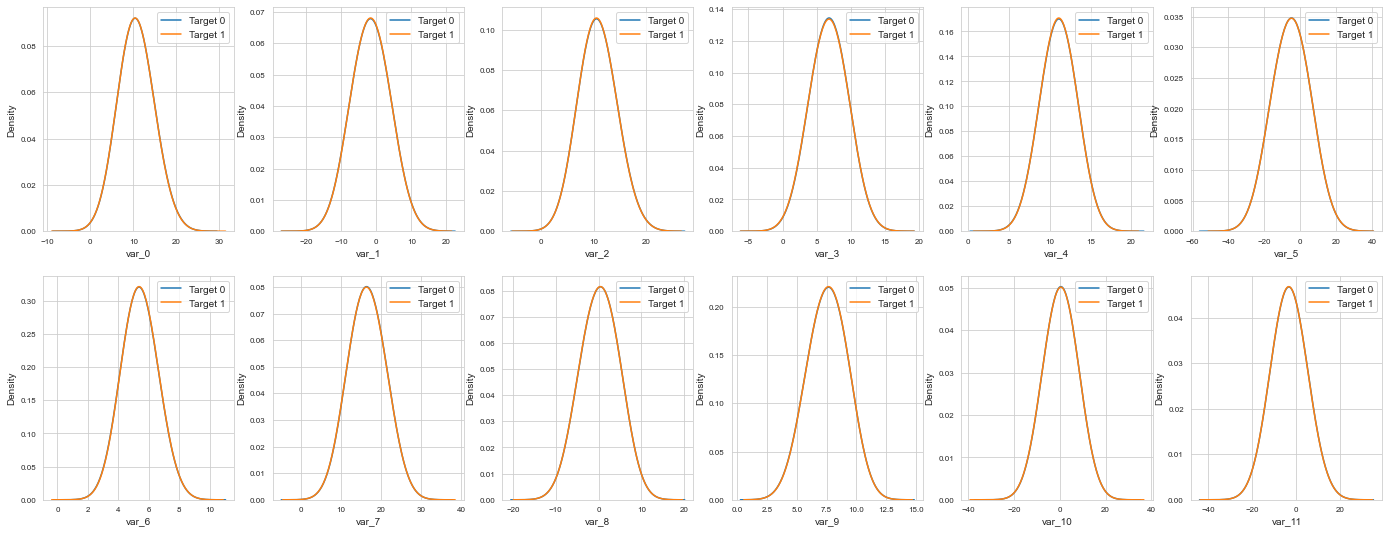

In [333]:
#The first 12 features distribuitions, density of each dataset
features = train_data.columns.values[2:14]
plotting_feature_distribution(train_data, test_data, features)

**Visualization of the distribution of maximum and minimum values, per column, in the test and training data.**

In [334]:
def plotting_max_distribution(df1, df2, features):

    plt.figure(figsize=(24,14))

    plt.title("Distribution of the Max Values in Train and Test data")
    sns.distplot(df1[features].max(axis=0), color="blue", kde=True, bins=120, label="Train Data")
    sns.distplot(df2[features].max(axis=0), color="green", kde=True, bins=120, label="Test Data")
    plt.legend()
    
def plotting_min_distribution(df1, df2, features):

    plt.figure(figsize=(24,14))

    plt.title("Distribution of the Min Values in Train and Test data")
    sns.distplot(df1[features].min(axis=0), color="blue", kde=True, bins=120, label="Train Data")
    sns.distplot(df2[features].min(axis=0), color="green", kde=True, bins=120, label="Test Data")
    plt.legend()

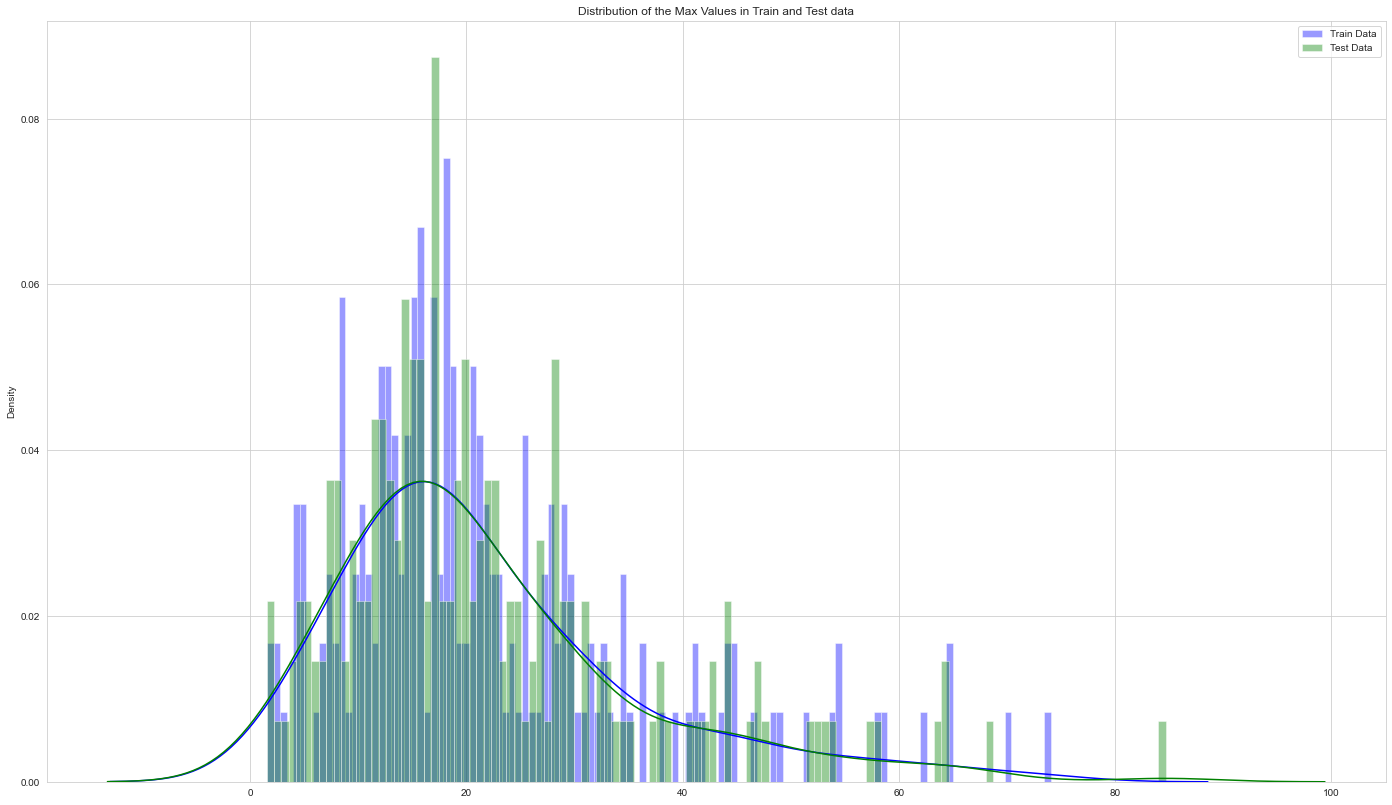

In [335]:
features = train_data.columns.values[2:200]
plotting_max_distribution(train_data, test_data, features)

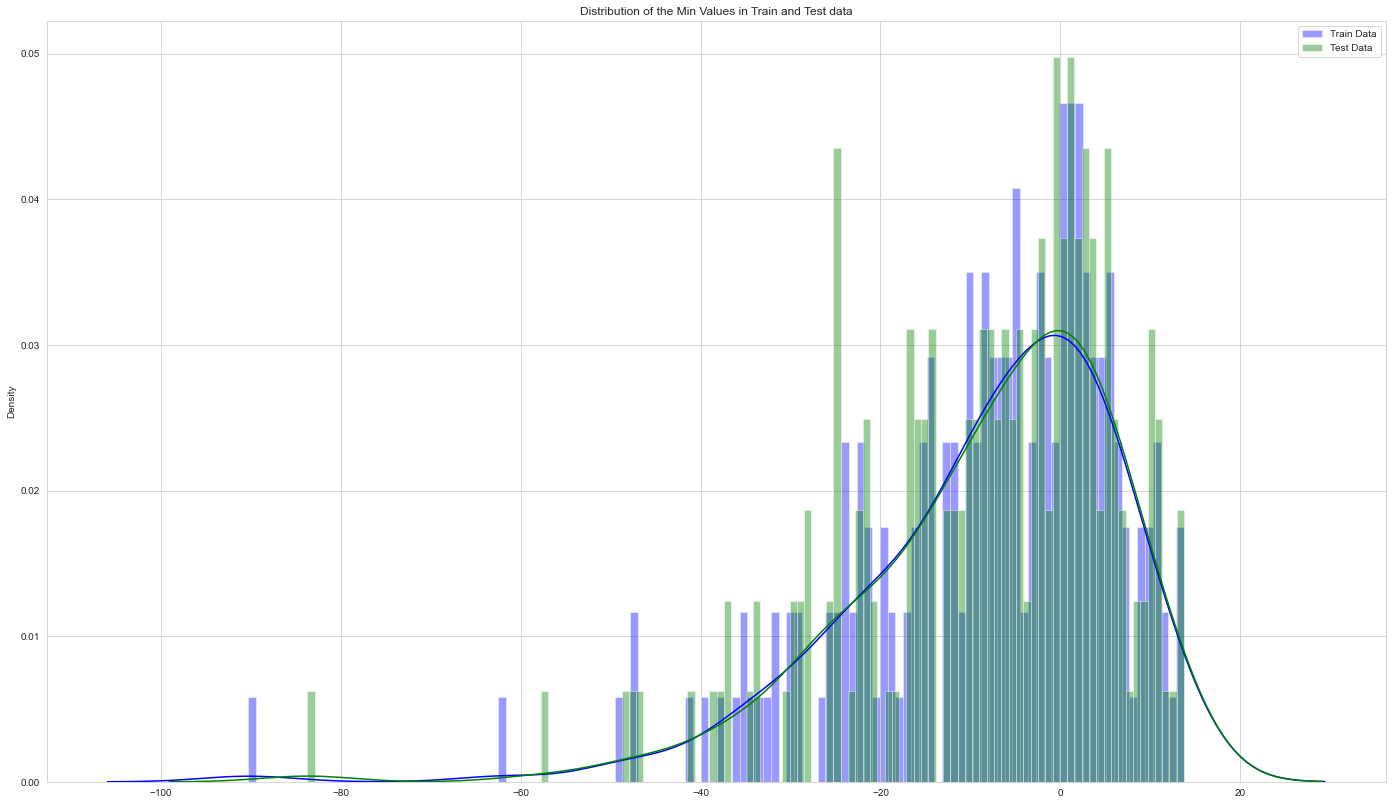

In [336]:
features = train_data.columns.values[2:200]
plotting_min_distribution(train_data, test_data, features)

**When we observe a low profile of each feature in training and testing, they have very close distribution. But looking at it in a very general way, they are not the same. 
The curves above shows us the maximum and minimum value of the distribution in the training and test data.**

Note: My guess is that the bank needs to predict whether customers will make any specific transactions in the future, regardless of the money transacted. There may be a set of transactions that they want to monitor or something like that, but it is not possible to know why they have negative or positive data, and what they mean. I believe that this can also be a time series, with lists of transactions made over a period of time. And we must predict whether the customer will carry out this transaction in the future again or not, given his previous transactions.

#### Evaluation Metric
---

To measure this prediction, I will use the Area under the ROC curve (AUC): Larger the area under the ROC curve, the better our model is! The way to think about this is the following: if we had a model which produced an ROC curve that had a single point at (1,0), the upper left corner, representing a true positive rate of one and a false positive rate of zero, this would be a great model!

The picture[*](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) bellow show how this AUC is defined. Basically, when the threshold = "0" (p = 0), the model predicts "1" for all the data, which means the true positive rate is equal to the false positive rate, is equal to one. When the threshold = "1", the model predicts "0" for all data, which means that both true and false positive rates are "0". If we vary the threshold between these two extremes, we get a series of diferent false positive and true positive rates.

<img src="img/ROC_curves.png" width="500" style="float:left"/>